# Exploratory Data Analysis on Penguin Data

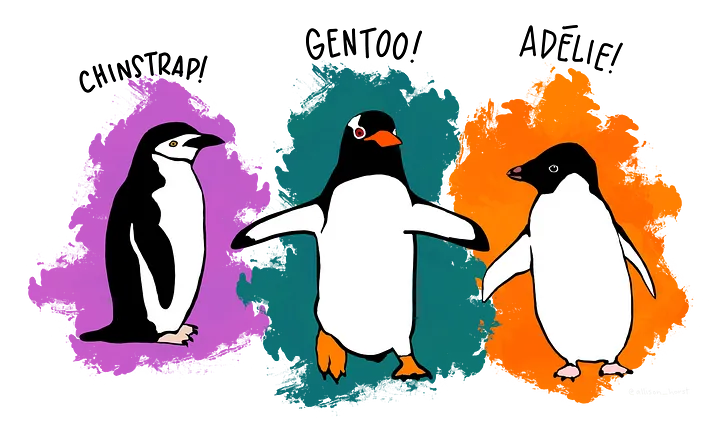

## About Dataset
Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

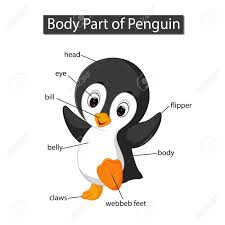
* species:	A factor denoting penguin species (Adélie, Chinstrap and Gentoo)
* island:	A factor denoting island in Palmer Archipelago, Antarctica (Biscoe, Dream or Torgersen)
* bill_length_mm:	A number denoting bill length (millimeters)
* bill_depth_mm:	A number denoting bill depth (millimeters)
* flipper_length_mm:	An integer denoting flipper length (millimeters)
* body_mass_g:	An integer denoting body mass (grams)
* sex:	Penguins sex (Male, Female)
* year: A number	An number denoting the year data was collected.


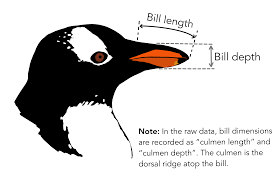

https://allisonhorst.github.io/palmerpenguins/reference/penguins_raw.html#:~:text=Clutch%20Completion,full%20clutch%2C%20i.e.%2C%202%20eggs

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv(r"C:\Users\Emy\Downloads\Penguin Dataset\penguins_lter.csv")
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [132]:
df.shape

(344, 17)

In [133]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [136]:
df.drop(columns=['studyName', 'Sample Number','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments','Individual ID'],inplace=True)

KeyError: "['studyName' 'Sample Number' 'Delta 15 N (o/oo)' 'Delta 13 C (o/oo)'\n 'Comments' 'Individual ID'] not found in axis"

In [137]:
'''df.drop(columns=['new date'],inplace=True)'''

"df.drop(columns=['new date'],inplace=True)"

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Stage                344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Date Egg             344 non-null    object 
 6   Culmen Length (mm)   342 non-null    float64
 7   Culmen Depth (mm)    342 non-null    float64
 8   Flipper Length (mm)  342 non-null    float64
 9   Body Mass (g)        342 non-null    float64
 10  Sex                  334 non-null    object 
dtypes: float64(4), object(7)
memory usage: 29.7+ KB


In [139]:
df['Date Egg']=pd.to_datetime(df['Date Egg'])

In [140]:
df.isnull().sum()

Species                 0
Region                  0
Island                  0
Stage                   0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
dtype: int64

In [141]:
df.shape

(344, 11)

In [142]:
df[~df['Sex'].isin(['MALE','FEMALE'])]

,Species,Region,Island,Stage,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN
8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,2007-11-09,34.1,18.1,193.0,3475.0,NaN
9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,2007-11-09,42.0,20.2,190.0,4250.0,NaN
10,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,2007-11-09,37.8,17.1,186.0,3300.0,NaN
11,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,2007-11-09,37.8,17.3,180.0,3700.0,NaN
47,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",Yes,2007-11-13,37.5,18.9,179.0,2975.0,NaN
246,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",Yes,2007-11-29,44.5,14.3,216.0,4100.0,NaN
286,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",Yes,2008-11-09,46.2,14.4,214.0,4650.0,NaN
324,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",Yes,2009-12-01,47.3,13.8,216.0,4725.0,NaN
336,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",Yes,2009-12-01,44.5,15.7,217.0,4875.0,.


In [143]:
df.dropna()

,Species,Region,Island,Stage,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,2007-11-16,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",No,2009-12-01,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",Yes,2009-11-22,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",Yes,2009-11-22,50.4,15.7,222.0,5750.0,MALE
342,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",Yes,2009-11-22,45.2,14.8,212.0,5200.0,FEMALE


In [144]:
df.dropna(inplace=True)

In [145]:
df.shape

(334, 11)

In [146]:
df.columns

Index(['Species', 'Region', 'Island', 'Stage', 'Clutch Completion', 'Date Egg',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex'],
      dtype='object')

In [147]:
df[df.duplicated()]

,Species,Region,Island,Stage,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex


In [148]:
df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


In [149]:
for col in df.select_dtypes('object').columns:
    print(col)
    print(df[col].unique())
    print("--------")

Species
['Adelie Penguin (Pygoscelis adeliae)'
 'Chinstrap penguin (Pygoscelis antarctica)'
 'Gentoo penguin (Pygoscelis papua)']
--------
Region
['Anvers']
--------
Island
['Torgersen' 'Biscoe' 'Dream']
--------
Stage
['Adult, 1 Egg Stage']
--------
Clutch Completion
['Yes' 'No']
--------
Sex
['MALE' 'FEMALE' '.']
--------


In [150]:
df.drop(columns=['Region','Stage'],inplace=True)

In [151]:
df['Species']=df['Species'].apply(lambda x:x.split()[0])

In [152]:
df[df['Sex']=='.'].index

Int64Index([336], dtype='int64')

In [153]:
df.drop(df[df['Sex']=='.'].index,inplace=True)

In [154]:
df

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,Torgersen,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,Yes,2007-11-16,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,No,2009-12-01,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,Yes,2009-11-22,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,Yes,2009-11-22,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,Yes,2009-11-22,45.2,14.8,212.0,5200.0,FEMALE


In [155]:
df.columns

Index(['Species', 'Island', 'Clutch Completion', 'Date Egg',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex'],
      dtype='object')

In [ ]:
df['Date Egg']

0     2007-11-11
1     2007-11-11
2     2007-11-16
4     2007-11-16
5     2007-11-16
         ...    
338   2009-12-01
340   2009-11-22
341   2009-11-22
342   2009-11-22
343   2009-11-22
Name: Date Egg, Length: 333, dtype: datetime64[ns]

In [ ]:
df['year']=df['Date Egg'].dt.year

In [ ]:
df.columns

Index(['Species', 'Island', 'Clutch Completion', 'Date Egg',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'year'],
      dtype='object')

In [ ]:
df.drop(columns=['Date Egg','Clutch Completion'],inplace=True)

In [ ]:
categoricalcolns=df.select_dtypes('object').columns
numericalcolns=df.select_dtypes('number').columns

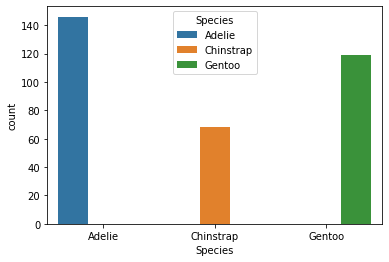

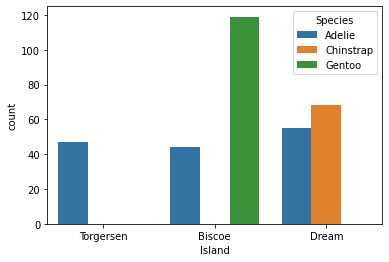

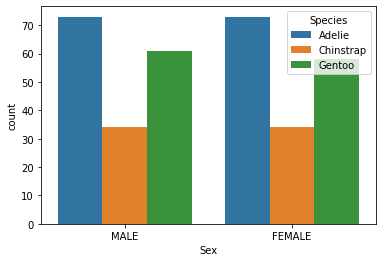

In [ ]:
for col in categoricalcolns:
    sns.countplot(data=df,x=col,hue='Species')
    plt.show()

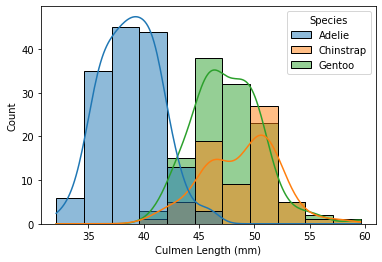

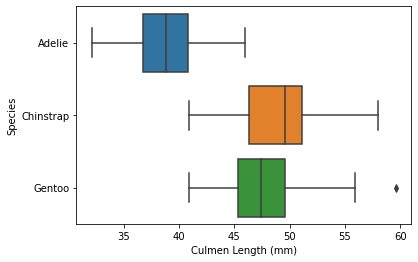

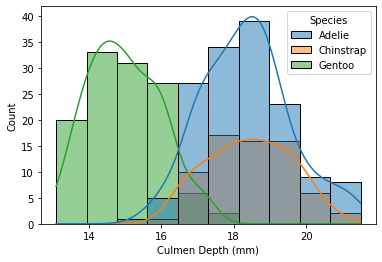

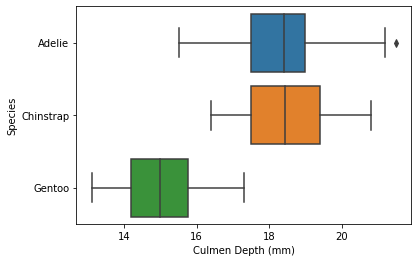

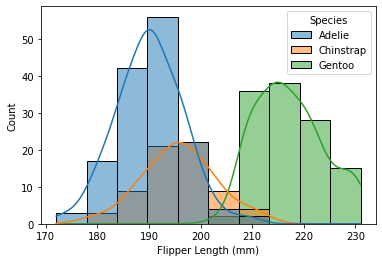

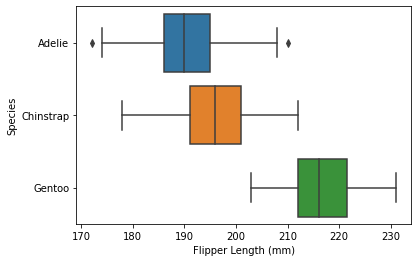

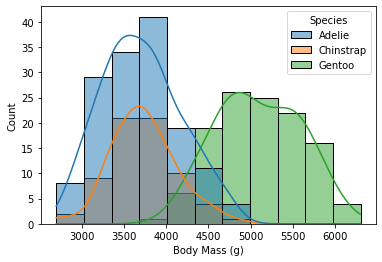

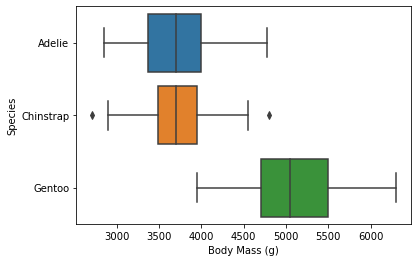

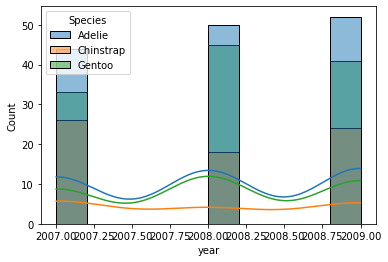

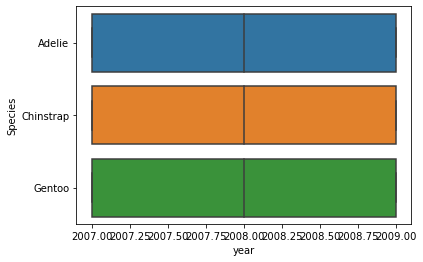

In [ ]:
for col in numericalcolns:
    sns.histplot(data=df,x=col,kde=True,hue='Species')
    plt.show()
    sns.boxplot(data=df,x=col,y='Species')
    plt.show()

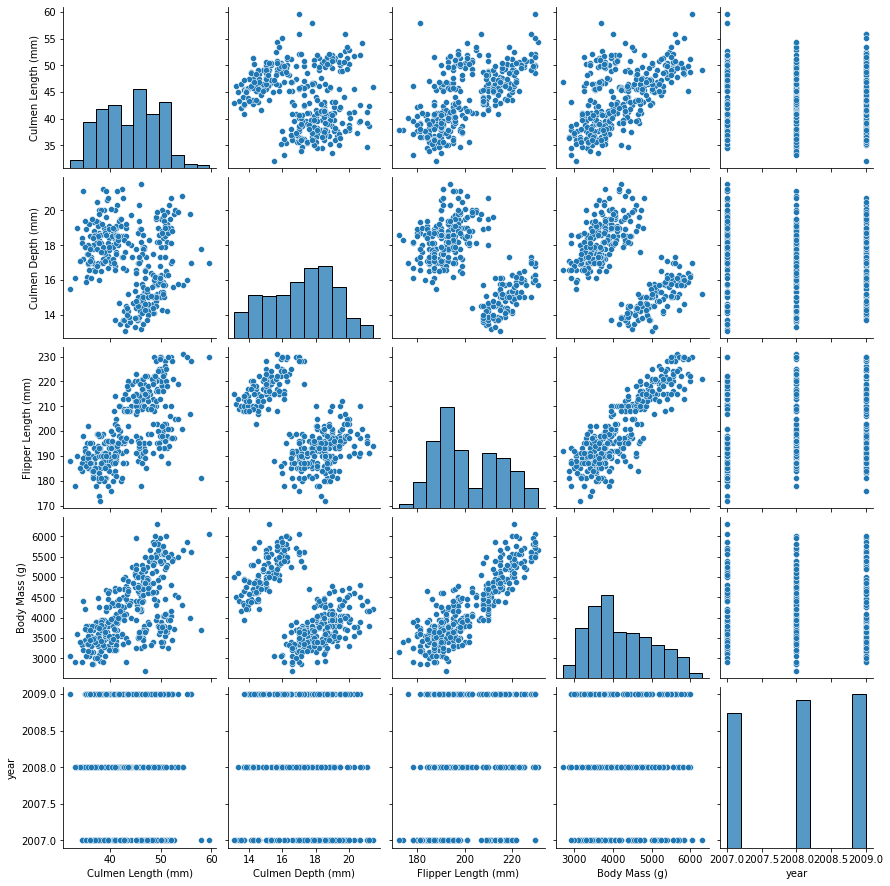

In [ ]:
sns.pairplot(data=df)

<AxesSubplot:>

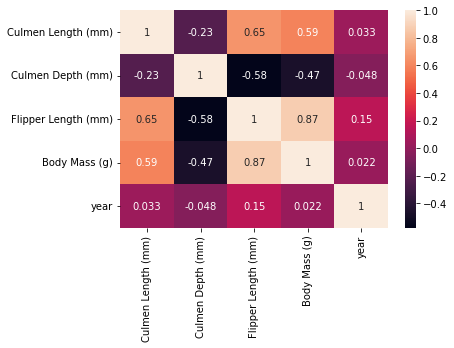

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.drop(columns=['year'],inplace=True)

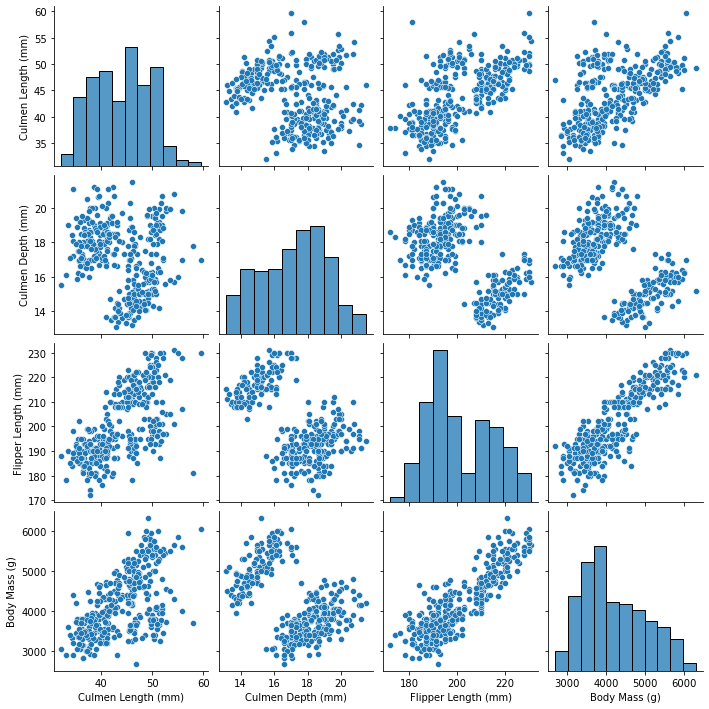

In [ ]:
sns.pairplot(data=df)

In [ ]:
df['Species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
subset_df=df[df['Species']=='Gentoo']

In [ ]:
subset_df.columns

Index(['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

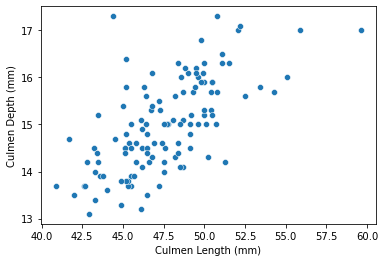

In [ ]:
sns.scatterplot(data=subset_df,x='Culmen Length (mm)',y='Culmen Depth (mm)')

<AxesSubplot:>

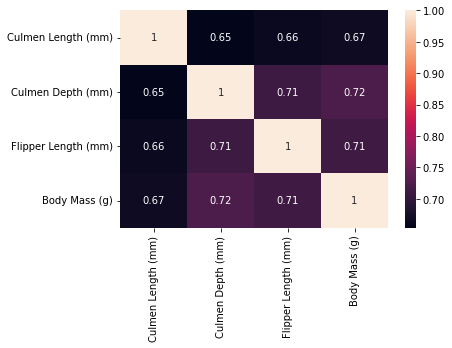

In [ ]:
sns.heatmap(subset_df.corr(),annot=True)

In [ ]:
'''from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
myencoder=OrdinalEncoder()
df[categoricalcolns]=myencoder.fit_transform(df[categoricalcolns])
df.head()'''

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,0.0,2.0,39.1,18.7,181.0,3750.0,1.0
1,0.0,2.0,39.5,17.4,186.0,3800.0,0.0
2,0.0,2.0,40.3,18.0,195.0,3250.0,0.0
4,0.0,2.0,36.7,19.3,193.0,3450.0,0.0
5,0.0,2.0,39.3,20.6,190.0,3650.0,1.0


In [ ]:
categoricalcolns


Index(['Species', 'Island', 'Clutch Completion', 'Sex'], dtype='object')

In [ ]:
'''df[['Species', 'Island', 'Sex']]=myencoder.inverse_transform(df[['Species', 'Island', 'Sex']])
df.head()'''

ValueError: Shape of the passed X data is not correct. Expected 4 columns, got 3.

In [ ]:
df['Date Egg'].value_counts()

2007-11-27    18
2007-11-16    15
2008-11-09    15
2009-11-18    14
2008-11-04    12
2009-11-21    12
2008-11-06    12
2008-11-13    12
2009-11-22    10
2009-11-15    10
2009-11-16    10
2008-11-14    10
2009-11-17    10
2009-11-27    10
2007-11-29     9
2008-11-08     8
2007-11-28     8
2008-11-03     8
2007-11-12     8
2008-11-24     8
2008-11-02     6
2007-12-03     6
2009-11-23     6
2009-11-20     6
2009-11-25     6
2009-12-01     5
2007-11-13     5
2007-11-21     4
2008-11-15     4
2007-11-15     4
2007-11-10     4
2009-11-10     4
2009-11-13     4
2007-11-09     4
2007-11-26     4
2007-11-19     4
2008-11-17     4
2007-11-30     4
2009-11-09     4
2008-11-25     4
2008-11-11     4
2009-11-12     2
2007-11-18     2
2008-11-07     2
2009-11-19     2
2007-11-22     2
2009-11-14     2
2008-11-05     2
2008-11-10     2
2007-11-11     2
Name: Date Egg, dtype: int64

In [157]:
df.columns

Index(['Species', 'Island', 'Clutch Completion', 'Date Egg',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex'],
      dtype='object')

In [159]:
df.drop(columns=['Clutch Completion', 'Date Egg'],inplace=True)

In [160]:
df

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [162]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Species'])
y=df['Species']
categoricalcolns=X.select_dtypes('object').columns
numericalcolns=X.select_dtypes('number').columns

X_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=101)


In [163]:
X_train.shape,x_test.shape,y_train.shape,y_test.shape

((249, 6), (84, 6), (249,), (84,))

In [164]:
mytransformer=ColumnTransformer([
    ('num',StandardScaler(),numericalcolns),
    ('categ',OneHotEncoder(),categoricalcolns)])

X_train=mytransformer.fit_transform(X_train)
x_test=mytransformer.transform(x_test)

In [167]:
X_train.shape,x_test.shape

((249, 9), (84, 9))

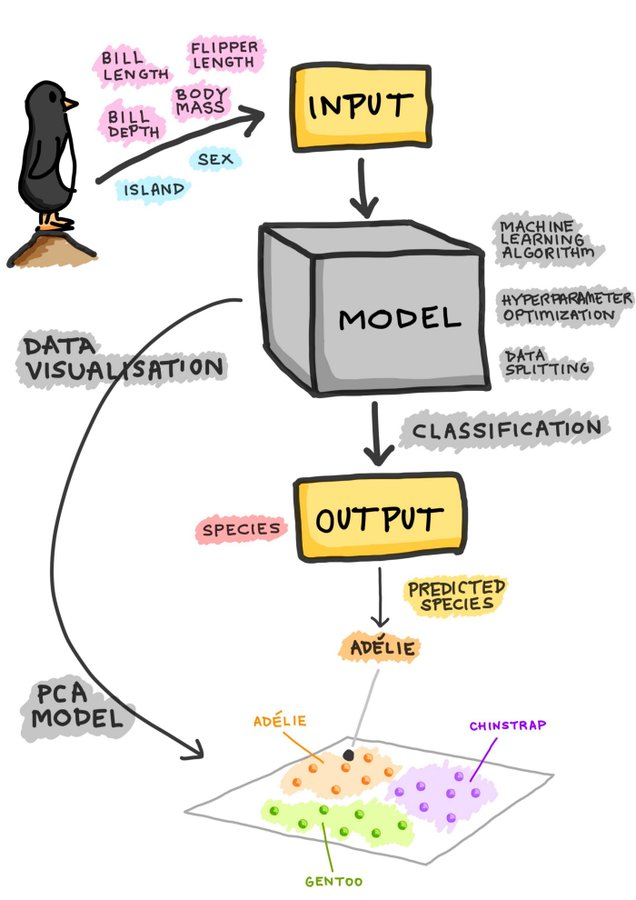

In [172]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [178]:
def traimmymodel(model,X_train,y_train,x_test,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(x_test)
    y_train_pred=model.predict(X_train)
    return y_pred,y_train_pred

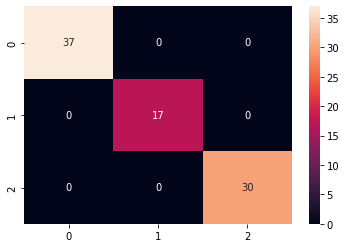

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        37
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       109
   Chinstrap       1.00      1.00      1.00        51
      Gentoo       1.00      1.00      1.00        89

    accuracy                           1.00       249
   macro avg       1.00      1.00      1.00       249
weighted avg       1.00      1.00      1.00       249



In [179]:
lgr=LogisticRegression()
y_pr,y_train_pred=traimmymodel(lgr,X_train,y_train,x_test,y_test)

sns.heatmap(confusion_matrix(y_pr,y_test),annot=True)
plt.show()
print(classification_report(y_pr,y_test))
print(classification_report(y_train_pred,y_train))

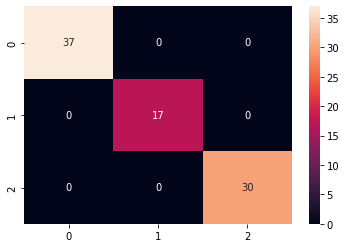

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        37
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       109
   Chinstrap       1.00      1.00      1.00        51
      Gentoo       1.00      1.00      1.00        89

    accuracy                           1.00       249
   macro avg       1.00      1.00      1.00       249
weighted avg       1.00      1.00      1.00       249



In [180]:
lgr=DecisionTreeClassifier()
y_pr,y_train_pred=traimmymodel(lgr,X_train,y_train,x_test,y_test)

sns.heatmap(confusion_matrix(y_pr,y_test),annot=True)
plt.show()
print(classification_report(y_pr,y_test))
print(classification_report(y_train_pred,y_train))

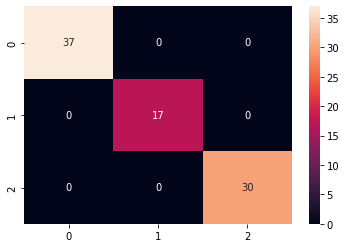

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        37
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       109
   Chinstrap       1.00      1.00      1.00        51
      Gentoo       1.00      1.00      1.00        89

    accuracy                           1.00       249
   macro avg       1.00      1.00      1.00       249
weighted avg       1.00      1.00      1.00       249



In [181]:
lgr=RandomForestClassifier()
y_pr,y_train_pred=traimmymodel(lgr,X_train,y_train,x_test,y_test)

sns.heatmap(confusion_matrix(y_pr,y_test),annot=True)
plt.show()
print(classification_report(y_pr,y_test))
print(classification_report(y_train_pred,y_train))

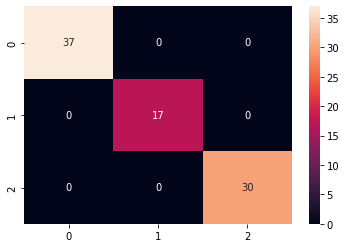

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        37
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99       107
   Chinstrap       1.00      0.96      0.98        53
      Gentoo       1.00      1.00      1.00        89

    accuracy                           0.99       249
   macro avg       0.99      0.99      0.99       249
weighted avg       0.99      0.99      0.99       249



In [182]:
lgr=KNeighborsClassifier()

y_pr,y_train_pred=traimmymodel(lgr,X_train,y_train,x_test,y_test)

sns.heatmap(confusion_matrix(y_pr,y_test),annot=True)
plt.show()
print(classification_report(y_pr,y_test))
print(classification_report(y_train_pred,y_train))

In [202]:
from sklearn.decomposition import PCA
myredu=PCA(n_components=3)
X_=myredu.fit_transform(X_train)

pd.DataFrame([])

""


In [203]:
myredu.explained_variance_ratio_

array([0.58041942, 0.22083209, 0.09776871])

In [194]:
y_train.index

Int64Index([ 33, 237, 196, 164, 264, 202, 277, 269,  38, 176,
            ...
            108,   1,  29,  53, 192, 306,  67,  44, 235, 182],
           dtype='int64', length=249)

In [195]:
ab=pd.DataFrame(X_,index=y_train.index)

In [193]:
ab.shape

(249, 2)

In [198]:
newdf=pd.concat([ab,y_train],axis=1)

In [199]:
newdf

,0,1,Species
33,-1.518312,0.897525,Adelie
237,3.214387,0.210994,Gentoo
196,-0.383895,0.514509,Chinstrap
164,-0.994354,0.007709,Chinstrap
264,2.719844,0.445558,Gentoo
...,...,...,...
306,1.483894,-1.484112,Gentoo
67,-0.939497,0.629498,Adelie
44,-2.177080,-0.960662,Adelie
235,2.667739,0.323757,Gentoo


<AxesSubplot:xlabel='0', ylabel='1'>

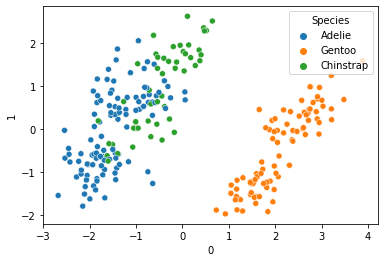

In [200]:
sns.scatterplot(data=newdf,x=0,y=1,hue='Species')

In [197]:
X_train

array([[-0.54678803,  0.87538525, -1.2035568 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.94403892, -1.02045968,  1.40915969, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.24938901,  0.36299473, -0.35618929, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.24729708, -0.14939579, -1.13294284, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.96200069, -0.76426442,  1.12670386, ...,  0.        ,
         0.        ,  1.        ],
       [-0.54678803, -0.30311295, -0.99171492, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
lgr=DecisionTreeClassifier()
y_pr,y_train_pred=traimmymodel(lgr,X_train,y_train,x_test,y_test)

sns.heatmap(confusion_matrix(y_pr,y_test),annot=True)
plt.show()
print(classification_report(y_pr,y_test))
print(classification_report(y_train_pred,y_train))